##Image Generation using GANs.

Using mnist dataset

In [84]:
#importing libraries

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from keras.layers import *
from keras.layers import LeakyReLU
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import keras

import seaborn as sns

from keras.datasets import mnist

In [85]:
import warnings
warnings.filterwarnings('ignore')

In [86]:
(X_train,_),(_,_) = mnist.load_data()
X_train.shape

(60000, 28, 28)

In [87]:
#Normalizing
X_train = (X_train-127.5)/127.5

In [88]:
TOTAL_EPOCHS = 50
BATCH_SIZE = 256
HALF_BATCH = 128

NO_OF_BATCHES = int(X_train.shape[0]/BATCH_SIZE)

NOISE_DIM = 100

adam = Adam(lr = 2e-4, beta_1 = 0.5)

In [89]:
#Generator Model : Upsampling

generator = Sequential()
generator.add(Dense(units = 7*7*128, input_shape = (NOISE_DIM,)))
generator.add(Reshape((7,7,128)))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# 7,7,128  >  14,14,64

generator.add(Conv2DTranspose(64, (3,3), strides = (2,2), padding = 'same'))
generator.add(LeakyReLU(0.2))
generator.add(BatchNormalization())

# 14,14,64 >  28,28,1 

generator.add(Conv2DTranspose(1, (3,3), strides = (2,2), padding = 'same', activation = 'tanh'))

generator.compile(loss = keras.losses.binary_crossentropy, optimizer = adam)
generator.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6272)              633472    
                                                                 
 reshape_4 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 leaky_re_lu_17 (LeakyReLU)  (None, 7, 7, 128)         0         
                                                                 
 batch_normalization_8 (Batc  (None, 7, 7, 128)        512       
 hNormalization)                                                 
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 14, 14, 64)       73792     
 ranspose)                                                       
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 14, 14, 64)      

In [90]:
#discriminator Model  Down Sampling

# 28,28,1  >  14,14,64

discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=(3,3), strides = (2,2), padding='same', input_shape = (28,28,1)))
discriminator.add(LeakyReLU(0.2))

#14,14,64  >  7,7,128

discriminator.add(Conv2D(128, kernel_size=(3,3), strides = (2,2), padding='same'))
discriminator.add(LeakyReLU(0.2))

# 7,7,128  >  6272
discriminator.add(Flatten())
discriminator.add(Dense(100))
discriminator.add(LeakyReLU(0.2))

discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss=keras.losses.binary_crossentropy, optimizer = adam)
discriminator.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        640       
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 leaky_re_lu_20 (LeakyReLU)  (None, 7, 7, 128)         0         
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_13 (Dense)            (None, 100)               627300    
                                                                 
 leaky_re_lu_21 (LeakyReLU)  (None, 100)             

In [91]:
# Combined

discriminator.trainable = False

gan_input = Input(shape = (NOISE_DIM, ))
generated_img = generator(gan_input)
gan_output = discriminator(generated_img)

#Functional API

model = Model(gan_input, gan_output)

model.compile(loss = keras.losses.binary_crossentropy, optimizer=adam)
model.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_10 (Sequential)  (None, 28, 28, 1)         708609    
                                                                 
 sequential_11 (Sequential)  (None, 1)                 701897    
                                                                 
Total params: 1,410,506
Trainable params: 708,225
Non-trainable params: 702,281
_________________________________________________________________


In [92]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_train.shape

(60000, 28, 28, 1)

In [98]:
def display_images(samples = 25):

  noise = np.random.normal(0,1, size=(samples, NOISE_DIM))
  generated_img = generator.predict(noise)

  plt.figure(figsize=(10,10))
  for i in range(samples):
    plt.subplot(5,5,i+1)
    plt.imshow(generated_img[i].reshape(28,28), cmap = 'binary')
    plt.axis('off')

Epoch1, Disc loss0.5984404531554279, Generator loss 1.4798745512962341
Epoch2, Disc loss0.6158261869707679, Generator loss 1.4115903076962528
Epoch3, Disc loss0.6530617954384568, Generator loss 1.2566473866120362
Epoch4, Disc loss0.6571796770151864, Generator loss 1.1795614402518313
Epoch5, Disc loss0.6584732834345255, Generator loss 1.1423263025080037
Epoch6, Disc loss0.6565697240269083, Generator loss 1.1217838225201664
Epoch7, Disc loss0.6539768673415877, Generator loss 1.112012113770868
Epoch8, Disc loss0.6541899887160358, Generator loss 1.1000475144793844
Epoch9, Disc loss0.6493439943107784, Generator loss 1.0960626520662227
Epoch10, Disc loss0.6468915990275196, Generator loss 1.102973025578719
Epoch11, Disc loss0.645936640090922, Generator loss 1.1049300360883403
Epoch12, Disc loss0.6430109490950903, Generator loss 1.1134794211795187
Epoch13, Disc loss0.640003011840531, Generator loss 1.1205863239418747
Epoch14, Disc loss0.6367030655089606, Generator loss 1.1342022138783054
Epoch

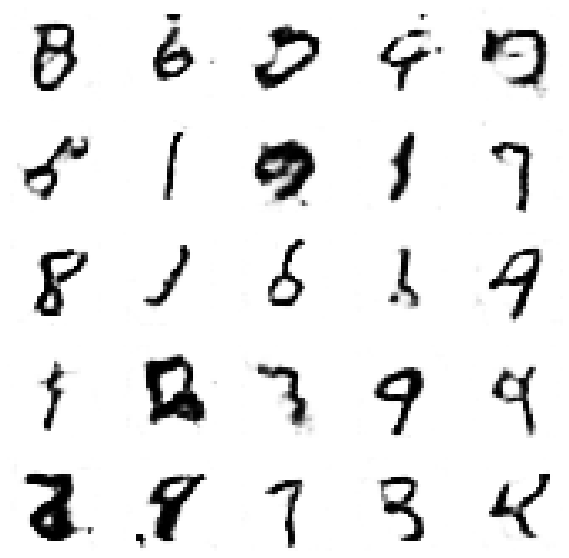

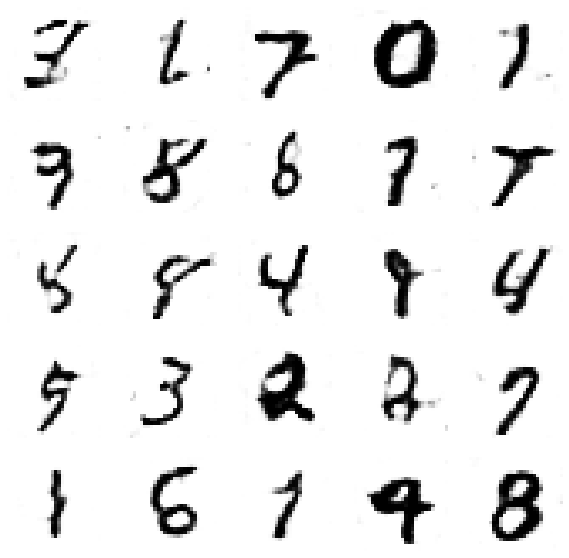

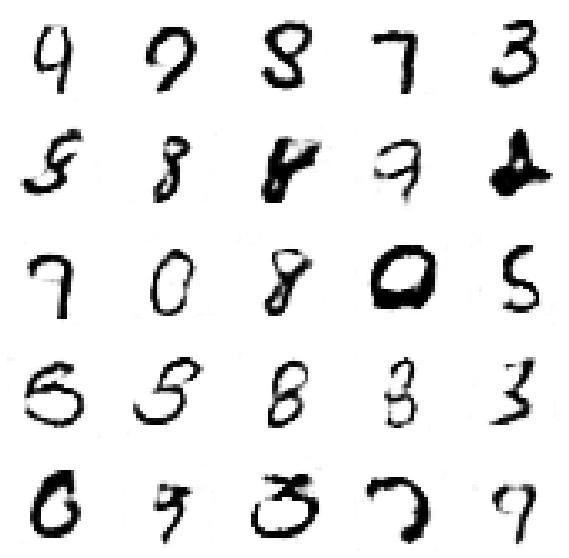

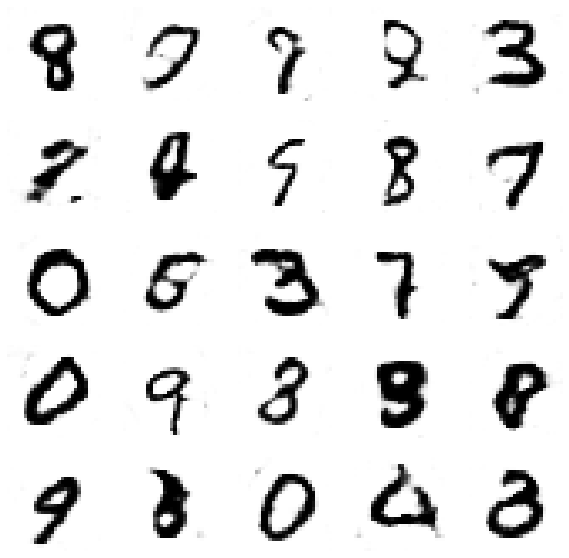

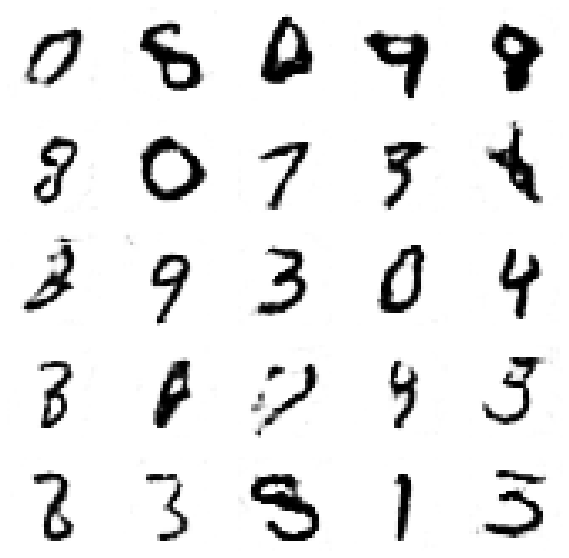

In [100]:
## Training Loop

d_losses = []
g_losses = []

for epoch in range(TOTAL_EPOCHS):

  epoch_d_loss = 0.0
  epoch_g_loss = 0.0

  #Mini batch gradient decent

  for step in range(NO_OF_BATCHES):
    #+++++++++++++++
    #Step 1 Train discriminator
    discriminator.trainable = True

    #get real data
    idx = np.random.randint(0,60000, HALF_BATCH)
    real_imgs = X_train[idx]

    #get fake data
    noise = np.random.normal(0,1, size=(HALF_BATCH, NOISE_DIM))
    fake_imgs = generator.predict(noise)

    #Labels
    real_y = np.ones((HALF_BATCH,1))*0.9
    fake_y = np.zeros((HALF_BATCH,1))

    #now, train D
    d_loss_real = discriminator.train_on_batch(real_imgs, real_y)
    d_loss_fake = discriminator.train_on_batch(fake_imgs, fake_y)

    d_loss = 0.5*d_loss_real + 0.5*d_loss_fake

    epoch_d_loss += d_loss

    #+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
    #Step 2 Train generator
    discriminator.trainable = False

    noise = np.random.normal(0,1, size=(BATCH_SIZE, NOISE_DIM))
    ground_truth_y = np.ones((BATCH_SIZE,1))

    g_loss = model.train_on_batch(noise, ground_truth_y)

    epoch_g_loss += g_loss

    #====================================== ==================================
  print(f'Epoch{epoch+1}, Disc loss{epoch_d_loss/NO_OF_BATCHES}, Generator loss {epoch_g_loss/NO_OF_BATCHES}')

  d_losses.append(epoch_d_loss/NO_OF_BATCHES)
  g_losses.append(epoch_g_loss/NO_OF_BATCHES)

  if ((epoch+1)%10 == 0):
    generator.save('generator.h5')
    display_images()

